In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import math
from scipy import linalg
from shenfun import *
  
def solve_system(N , returnmat=False):
    x = sp.Symbol('x', real=True)
    family = 'Chebyshev'; kw = {}
    e = 1e-2
    ue = sp.airyai((1/e)**(sp.Rational(1, 3))*x)
    SN = FunctionSpace(N, family, bc=(ue.subs(x, -1), ue.subs(x, 1)))
    VN = FunctionSpace(N+2, family, basis='Phi2')
    u = TrialFunction(SN)
    v = TestFunction(VN)
    A = [inner(div(grad(u)), e*v)] + inner(u, -x*v)
    sol = la.Solver(A)
    if returnmat:
        return sol.mat
    u_hat = Function(SN)
    f_hat = Function(SN)
    u_hat = sol(f_hat, u_hat)
    return u_hat[0:N-2]

def main (N):
    M = math.ceil(1.01*N)
    u1 = solve_system(N)
    u2 = solve_system(M)
    return np.linalg.norm(u1 - u2[0:N-2], ord=np.inf)
    # return u1

# 调用函数
NN = np.arange(10, 370, 20)
# NN = np.arange(50, 150, 50)
error = []
for N in NN:
    error.append(main(N))

# 将数据组合成一个二维数组
data_to_save = np.column_stack((NN, error))

# 保存数据到文本文件
np.savetxt('shenfun.txt', data_to_save, fmt='%.18e', delimiter=',')

[0.014363054545408593, 1.3793202691125828e-12, 1.9387045606711586e-26, 4.624284932271896e-44, 4.667261458395856e-61, 1.7526404080620745e-80, 4.5719495651291e-100, 3.4178270928174525e-122, 2.1522393273218335e-144, 1.1407588953073183e-167, 2.2444127733846047e-190, 1.6244678911213524e-214, 2.480379901822118e-239, 1.008697930024861e-263, 3.1102725442849923e-289, 3.129114887e-315, 0.0, 0.0]


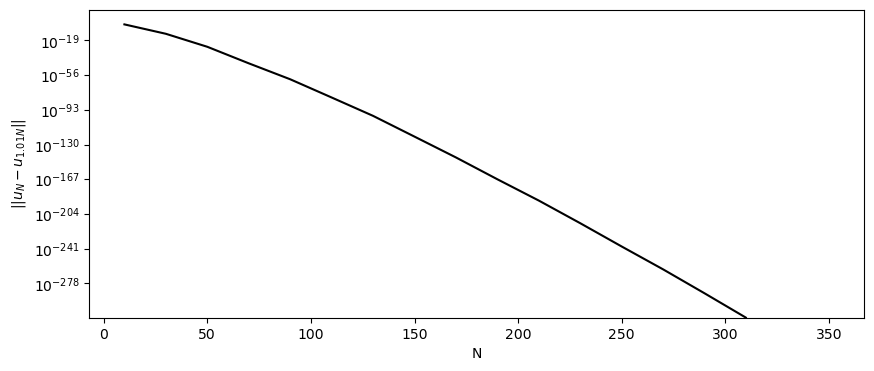

In [2]:
e = 1e-3
x = sp.Symbol('x', real=True)
print(error)

# 创建单个图形
plt.figure(figsize=(10, 4))
plt.semilogy(NN, error, 'k')  # 绘制半对数曲线
plt.xlabel('N')
plt.ylabel('$||u_N-u_{1.01N}||$')
plt.show()  # 显示图形